In [1]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline
sys.path.append('..')
from zwatershed import *
from visualization.visualize_funcs import *
from edgelist_methods import *
path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'
from multiprocessing import Pool

# -------------------------------- parameters ---------------------------------------
pred_file = '/groups/turaga/home/turagas/research/caffe_v2/processed/bock2/120000/sample_A_x1_y1_z1_xy1.h5'
pred_file_2 = '/groups/turaga/home/turagas/research/caffe_v2/processed/bock2/120000/cutout_3k.h5'
out_folder = '/nobackup/turaga/singhc/par_zwshed/'
threshes = [2000]
cmap = matplotlib.colors.ListedColormap(np.vstack(((0, 0, 0), np.random.rand(255, 3))))
NUM_WORKERS = 16
MAX_LEN = 400

# -------------------------------- load data ---------------------------------------
f = h5py.File(pred_file, 'r')
preds = f['main']
print preds.shape

(3, 125, 1250, 1250)


# Divide Volumes, set up args

In [2]:
def zwshed_h5_par(arg):
    (pred_vol,threshes,seg_save_path) = arg
    print "calculating",seg_save_path,"watershed"
    zwatershed_h5(pred_vol, threshes,seg_save_path)
    print "finished",seg_save_path,"watershed"
def dim_to_name(start):
    return str(start[0])+'_'+str(start[1])+'_'+str(start[2])+'_vol/'

In [16]:
dims = np.array((preds.shape[1:]))
print "dims",dims # x,y,z
num_vols = np.array([int(x/MAX_LEN)+1 for x in dims])
# num_vols[0] = 2 # delete this!
deltas = dims/num_vols
print "num_vols",num_vols
print "deltas",deltas
starts,ends = [],[]
for x in range(num_vols[0]):
    for y in range(num_vols[1]):
        for z in range(num_vols[2]):
            starts.append((x,y,z)*deltas)
            extra = 3*np.array([x==num_vols[0]-1,y==num_vols[1]-1,z==num_vols[2]-1],dtype='int')
            ends.append((x,y,z)*deltas + deltas + [1,1,1]+extra)
args = []
for i in range(len(starts)):
    s,e = starts[i],ends[i]
    pred_vol = preds[:,s[0]:e[0],s[1]:e[1],s[2]:e[2]]
    print s,e,pred_vol.shape
    args.append((pred_vol,threshes,out_folder+dim_to_name(s)))    

dims [ 125 1250 1250]
num_vols [2 4 4]
deltas [ 62 312 312]
[0 0 0] [ 63 313 313] (3, 63, 313, 313)
[  0   0 312] [ 63 313 625] (3, 63, 313, 313)
[  0   0 624] [ 63 313 937] (3, 63, 313, 313)
[  0   0 936] [  63  313 1252] (3, 63, 313, 314)
[  0 312   0] [ 63 625 313] (3, 63, 313, 313)
[  0 312 312] [ 63 625 625] (3, 63, 313, 313)
[  0 312 624] [ 63 625 937] (3, 63, 313, 313)
[  0 312 936] [  63  625 1252] (3, 63, 313, 314)
[  0 624   0] [ 63 937 313] (3, 63, 313, 313)
[  0 624 312] [ 63 937 625] (3, 63, 313, 313)
[  0 624 624] [ 63 937 937] (3, 63, 313, 313)
[  0 624 936] [  63  937 1252] (3, 63, 313, 314)
[  0 936   0] [  63 1252  313] (3, 63, 314, 313)
[  0 936 312] [  63 1252  625] (3, 63, 314, 313)
[  0 936 624] [  63 1252  937] (3, 63, 314, 313)
[  0 936 936] [  63 1252 1252] (3, 63, 314, 314)
[62  0  0] [128 313 313] (3, 63, 313, 313)
[ 62   0 312] [128 313 625] (3, 63, 313, 313)
[ 62   0 624] [128 313 937] (3, 63, 313, 313)
[ 62   0 936] [ 128  313 1252] (3, 63, 313, 314)
[ 62 

# Call Watershed

In [4]:
p = Pool(NUM_WORKERS)
p.map(zwshed_h5_par, args)

calculating /nobackup/turaga/singhc/par_zwshed/0_0_0_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_0_312_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_0_624_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_0_936_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_312_0_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_312_312_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_312_624_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_312_936_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_624_0_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_624_312_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_624_624_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_624_936_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_936_0_vol/ watershed
calculating /nobackup/turaga/singhc/par_zwshed/0_936_312_vol/ watershed
calculat

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Stitch

	i,x,y,z 0 0 0 0
	shapes (63, 313, 1250) (63, 313, 313)
	i,x,y,z 1 0 0 1
	shapes (63, 313, 1250) (63, 313, 313)
merging numbers, 166 keys ... 
	nsegs before 1447


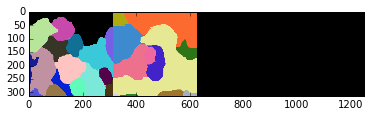

	nsegs after 1281


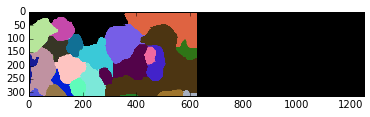

	renumbering all... 1446
	num segs 1280


/groups/turaga/home/singhc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/groups/turaga/home/singhc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


In [45]:
# todo - have this support several threshes - for filename in os.listdir(arg[2]):
i = 0
seg_out = np.zeros(dims,dtype='uint64')
re_x = {}
for x in range(1): #num_vols[0]):
    i = x*num_vols[1]*num_vols[2]
    sx,ex = starts[i],ends[i]
    
    # start ybar --------------------------------------------------
    xdim = deltas[0]+1
    if x==num_vols[0]-1:
        xdim = dims[0]-deltas[0]*(num_vols[0]-1)
    ybar = np.zeros((xdim,dims[1],dims[2]),dtype='uint64')
    re_y = {}
    for y in range(1): #num_vols[1]):
        i = x*num_vols[1]*num_vols[2]+y*num_vols[2]
        sy,ey = starts[i], ends[i]
        
        # start zbar -----------------------------------------------
        ydim = deltas[1]+1
        if y==num_vols[1]-1:
            ydim = dims[1]-deltas[1]*(num_vols[1]-1)
        zbar = np.zeros((xdim,ydim,dims[2]),dtype='uint64')
        re_z = {} # maxes -> mins
        for z in range(2): #num_vols[2]):  # merge along z axis - fills in zbar
            i = x*num_vols[1]*num_vols[2]+y*num_vols[2]+z
            arg,s,e = args[i],starts[i],ends[i]
            filename = 'seg_2000.h5'
            seg_h5 = h5py.File(arg[2]+filename,'r')
            seg = seg_h5['main']+np.max(zbar)
            print "\ti,x,y,z",i,x,y,z
            print "\tshapes",zbar.shape,seg.shape
            if z==0: # don't merge
                zbar[:,:,s[2]:e[2]] = seg[:,:,:]
            else: # merge
                edge_mins = zbar[:,:,s[2]].flatten()
                edge_maxes = seg[:,:,0].flatten()                
                re_z = calc_renums(edge_mins,edge_maxes, re_z)
                zbar[:,:,s[2]:e[2]] = seg[:,:,:]
        zbar = merge_and_renum(re_z,zbar,inc=True)
        # end zbar --------------------------------------------------
        '''
        
        if y==0: # don't merge
            ybar[:,sy[1]:ey[1],:] = zbar[:,:,:]
        else: # merge
            edge_mins = ybar[:,s[1],:].flatten()
            edge_maxes = zbar[:,0,:].flatten()
            re_y = calc_renums(edge_mins,edge_maxes, re_y)
            ybar[:,sy[1]:ey[1],:] = zbar[:,:,:]
    ybar = merge_and_renum(re_y,ybar,inc=True)
    display_seg_yz(ybar,1)
    # end ybar -------------------------------------------------------

    if x==0: # don't merge
        seg_out[sx[0]:ex[0],:,:] = ybar[:,:,:]
    else: # merge
        edge_mins = seg_out[sx[0],:,:].flatten()
        edge_maxes = ybar[0,:,:].flatten()
        re_x = calc_renums(edge_mins,edge_maxes,re_x)
        seg_out[sx[0]:ex[0],:,:] = ybar[:,:,:]
seg_out = merge_and_renum(re_x,seg_out,inc=False)
display_seg_xy(seg_out)
'''

In [42]:
def calc_renums(edge_mins,edge_maxes, renums):
    for j in range(len(edge_mins)):
        edge_min = edge_mins[j]
        edge_max = edge_maxes[j]
        if not edge_max==edge_min:

#                         if edge_max in renums: # already in map
#                             old_min = renums[edge_max]
#                             merge_max = max(old_min,edge_min)
#                             merge_min = min(old_min,edge_min)
#                             if not merge_max==merge_min:
#                                 renums[merge_max] = merge_min  

            renums[edge_max] = edge_min
    return renums
    
def merge_and_renum(renums,zbar,inc=True):
    # merge numbers
    renums2 = {}
    print "merging numbers,",len(renums.keys()),"keys ... "            
    for key in renums:
        val = renums[key]
        while val in renums:
            val = renums[val]
        renums2[key] = val

    print "\tnsegs before",len(np.unique(zbar))
    display_seg_yz(zbar,1)
    mp = np.arange(0,np.max(zbar)+1,dtype='uint64')
    mp[renums2.keys()] = renums2.values()
    zbar = mp[zbar]
    print "\tnsegs after",len(np.unique(zbar))
    display_seg_yz(zbar,1)

    # renumber all
    print "\trenumbering all...",np.max(zbar)
    zbar,seg_sizes = prune_and_renum(zbar,0)
    print "\tnum segs",np.max(zbar)
#     display_seg_yz(zbar,1)
    if inc:
        zbar += np.max(zbar)
    return zbar

# Visualize

In [44]:
def display_affs(raw, label, seg):
    fig = plt.figure(figsize=(20, 10))
    fig.set_facecolor('white')
    ax1, ax2, ax3 = fig.add_subplot(1, 3, 1), fig.add_subplot(1, 3, 2), fig.add_subplot(1, 3, 3)
    fig.subplots_adjust(left=0.2, bottom=0.25)
    ax1.imshow(np.transpose(raw[:, :, :, 1],(2,1,0)))
    ax1.set_title('Raw')
    plt.show()
def display_seg_yz(raw,depth=1):
    plt.imshow(raw[depth, :, :], cmap=cmap)
    plt.show()
def display_seg_xy(raw,depth=1):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0.2, bottom=0.25)
    ax1.imshow(raw[:, :, depth], cmap=cmap)
    plt.show()
def prune_and_renum(seg,sizeThreshold=1):
    segId,segSizes = np.unique(seg, return_counts=True)
    renum = np.zeros(segId.max()+1,dtype=np.int32)
    renum[segId] = np.arange(0,len(segId)+1)
    if sizeThreshold>0:
        renum[segId[segSizes<=sizeThreshold]] = 0
        segSizes = segSizes[segSizes>sizeThreshold]
    seg = renum[seg]
    return (seg, segSizes)

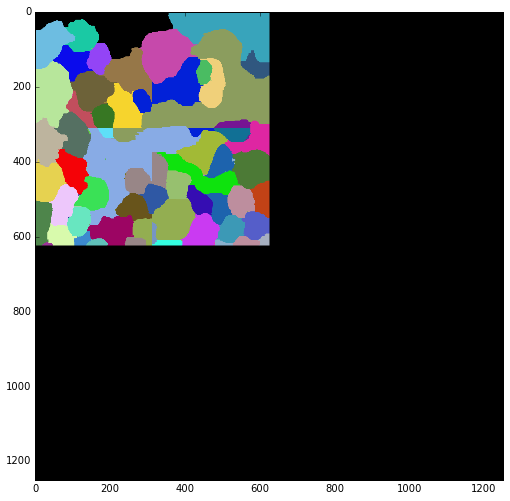

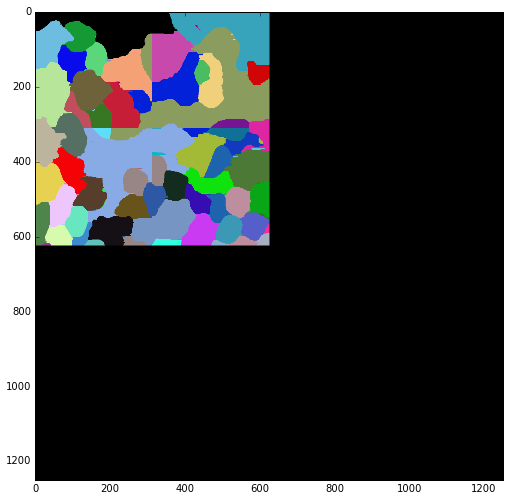

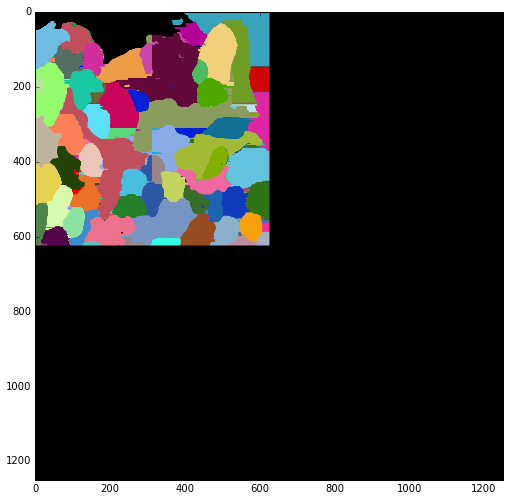

In [31]:
display_seg_yz(seg_out,1)
display_seg_yz(seg_out,2) 
display_seg_yz(seg_out,3)